# Customer Churn Analysis - Jupyter Notebook

## I. Introduction

The dataset we are experimenting with was found [here](https://www.kaggle.com/blastchar/telco-customer-churn). To gain insight on what we are working with, I've copied and pasted the bulk of the description from the link:

> **Context**
>
> "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." \[IBM Sample Data > Sets\]
>
> **Content**
>
> Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
>
> The data set includes information about:
>
> * Customers who left within the last month – the column is called Churn
> * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> * Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> * Demographic info about customers – gender, age range, and if they have partners and dependents


The link above doesn't tell us much about the where the data is gathered from, but based on the description of the variables/columns, we can assume that this data is from a telecommuncations company similar to that of Verizon or Comcast.

*Description of columns will be shown in the next section*

As stated in the **Content** section, "Churn" refers to whether or not the customer left the company within the last month or stayed with the company. This will be our response variable.

We're going to investigate this problem using **Random Forest**, **Decision Tree Classifiers**, and **Support Vector Machine** to see what information we can find. We can also use these methods to raise new questions and strategies for customer retention.

#### Libraries we'll use:

* More libraries will be imported later in the project. Here below is what we need to get started.

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## II. Load the Dataset

Let's get started by getting this dataset loaded into our notebook for a short glimpse of the data.

In [216]:
data = pd.read_csv('./data/TelcoCustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Before we go any further, I will share a description of each column as described on the dataset's [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) page. 

**customerID** Customer ID

**gender** Whether the customer is a male or a female

**SeniorCitizen** Whether the customer is a senior citizen or not (1, 0)

**Partner** Whether the customer has a partner or not (Yes, No)

**Dependents** Whether the customer has dependents or not (Yes, No)

**tenure** Number of months the customer has stayed with the company

**PhoneService** Whether the customer has a phone service or not (Yes, No)

**MultipleLines** Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService** Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity** Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup** Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection** Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport** Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV** Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies** Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract** The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling** Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** The amount charged to the customer monthly

**TotalCharges** The total amount charged to the customer

**Churn** Whether the customer churned or not (Yes or No)

## III. Exploratory Data Analysis (EDA) & Data Manipulation

First, lets view the size of this dataset, find out of anything is missing from it, and if we have any duplicate entries.

In [5]:
print('We have %d rows of data with %d columns.\n' % (data.shape[0], data.shape[1]))
dups = data[data.duplicated()]
print("Number of duplicate rows: %d\n" % len(dups))

We have 7043 rows of data with 21 columns.

Number of duplicate rows: 0



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Next, we'll display some plots for the various columns to get a good understanding of how the data is distributed.

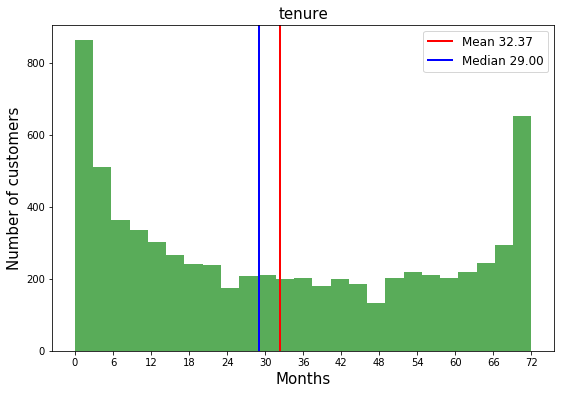

In [8]:
plt.figure(figsize = (9,6))
ten_mean = np.mean(data['tenure'])
ten_med = np.median(data['tenure'])
_ = plt.hist(data["tenure"], bins = 25, alpha = 0.65, color = 'green')
_ = plt.title("tenure", fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Months", fontsize = 15)
_ = plt.xticks(np.arange(0, 75, step=6))
_ = plt.axvline(ten_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % ten_mean)
_ = plt.axvline(ten_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % ten_med)
_ = plt.legend(fontsize = 12)

In [5]:
print("Percentage of customers who left before 6 months? : %.2f%%" % ((len(data[data['tenure'] < 6])) / len(data['tenure']) * 100))

Percentage of customers who left before 6 months? : 19.47%


Wow, that is A LOT of people leaving in their first 5 months with the company, and then something happens around the 6 year mark that is also causing people to leave. Let's focus on those people leaving in the first 5 months and see if they are breaking contract or leaving their Month-to-month plans.

In [24]:
under_6 = data[data['tenure'] < 6]

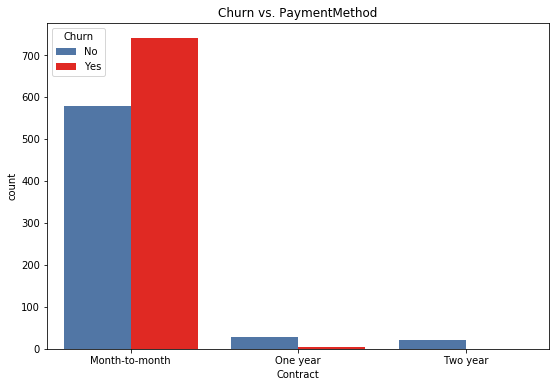

In [25]:
col_scheme = ["#4374B3", "#FF0B04" ]
sns.set_palette(sns.color_palette(col_scheme))
plt.figure(figsize=(9,6))
sns.countplot('Contract', hue='Churn', data=under_6).set_title('Churn vs. PaymentMethod')

plt.show()

The good news here is that there aren't that many customers who become so disgruntled that they decide to break contract. The amount of Month-to-month customers leaving before 6 months is still alarming though.

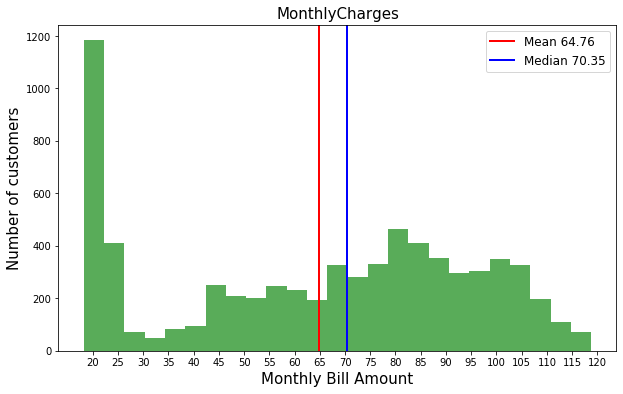

In [9]:
plt.figure(figsize = (10,6))
mc_mean = np.mean(data['MonthlyCharges'])
mc_med = np.median(data['MonthlyCharges'])
_ = plt.hist(data["MonthlyCharges"], bins = 25, alpha = 0.65, color = 'green')
_ = plt.xticks(np.arange(20, 125, step=5))
_ = plt.title("MonthlyCharges", fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Monthly Bill Amount", fontsize = 15)
_ = plt.axvline(mc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % mc_mean)
_ = plt.axvline(mc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % mc_med)
_ = plt.legend(fontsize = 12)

In [10]:
print("Percentage of customers with a Monthly Bill of $25 or less? : %.2f%%" % ((len(data[data['MonthlyCharges'] < 25.01])) / len(data['MonthlyCharges']) * 100))

Percentage of customers with a Monthly Bill of $25 or less? : 19.96%


For some odd reason, we run into an small issue here where **TotalCharges** is being read as a string variable. We'll coerce it to a float so we can proceed with our histogram.

In [217]:
# Convert data in 'TotalCharges' from string to float.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [218]:
print("How many missing values in 'TotalCharges' after coercion? : %d" % data['TotalCharges'].isnull().sum())
print("What percentage of the data are these missing values? : %0.2f%%" % ((data['TotalCharges'].isnull().sum()) / (len(data['TotalCharges'])) * 100))

How many missing values in 'TotalCharges' after coercion? : 11
What percentage of the data are these missing values? : 0.16%


After coercion of **TotalCharges** from string to float, we see that we actaully do have some missing values. It is safe to assume that these values are simply missing at random, so we’ll just remove these observations considering they only account for **0.16%** of the data.

In [219]:
data2 = data[data["TotalCharges"].notnull()] # Keep rows for which 'TotalCharges' has recorded data
data2 = data2.reset_index()[data2.columns] # Reset the index of the dataframe

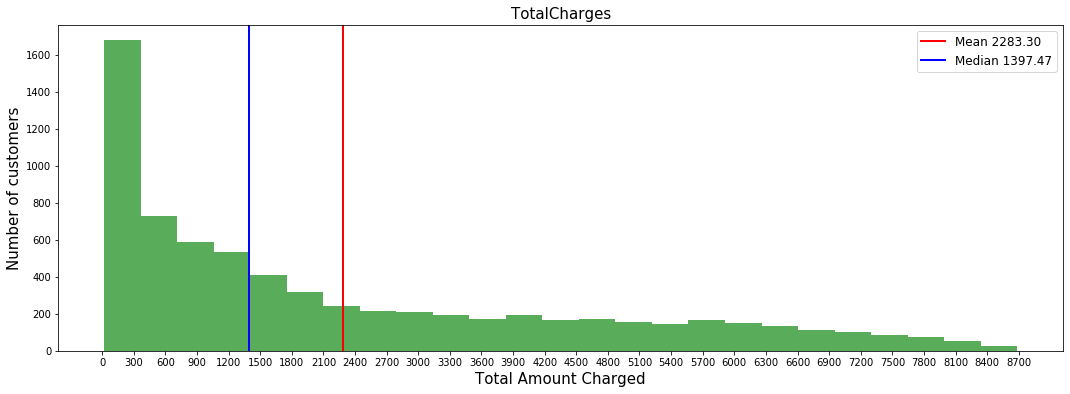

In [16]:
plt.figure(figsize = (18,6))
tc_mean = np.mean(data2['TotalCharges'])
tc_med = np.median(data2['TotalCharges'])
_ = plt.hist(data2['TotalCharges'], bins = 25, alpha = 0.65, color = 'green')
_ = plt.title('TotalCharges', fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Total Amount Charged", fontsize = 15)
_ = plt.xticks(np.arange(0, 8800, 300))
_ = plt.axvline(tc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % tc_mean)
_ = plt.axvline(tc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % tc_med)
_ = plt.legend(fontsize = 12)

In [14]:
print("Percentage of customers with TotalCharges less than $300? : %.2f%%" % ((len(data2[data2['TotalCharges'] < 300])) / len(data2['TotalCharges']) * 100))

Percentage of customers with TotalCharges less than $300? : 21.33%


We had to stretch out this histogram in order to get a better look, but we see that **21.33%** of the customers had **TotalCharges** less than **\$300**.

With the visuals above we can gather that:
* Getting these customers to stay for even just 6 months is a major problem. This accounts for **19.34%** of customers in the dataset.
* The minimum amount a customer can pay per month is **\\$18.25** and **19.94%** of customers are paying no more than **\\$6.75** of that minimum amount. 
* About 1/5th of the customers in this data set have only been charged less than **\\$300** total, which makes sense when we consider the previous two points.

Something else we should look into are the columns that have a relationship with **InternetService**. For columns **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies** the responses are: 'Yes', 'No', and 'No internet service'. We should make sure that if a customer has no internet service they also have a response for the above columns of 'No internet service'. If this is the case across the board, we can change these columns to binary variables with responses of simply 'Yes' or 'No'.

*This is technically a data preprocessing step, but thats okay, we can do it here. More on data preprocessing later.*

In [17]:
no_www = data2[data2.InternetService == 'No'] # Subset customers that have no internet service

In [18]:
# Check for unique values in the given columns. Should only print 'No internet service' to confirm our assumption.
print(no_www['OnlineSecurity'].unique())
print(no_www['OnlineBackup'].unique())
print(no_www['DeviceProtection'].unique())
print(no_www['TechSupport'].unique())
print(no_www['StreamingTV'].unique())
print(no_www['StreamingMovies'].unique())

['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']


Confirmed! So, for the above columns/variables, we'll convert to binary. Which, in this case, simply means that we are removing a 3rd response option, leaving us with only 'Yes' or 'No'.

In [19]:
# Create a list for looping through the dataframe and converting to binary 
binaries = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [20]:
# Loop and replace
for i in binaries:
    data2[i] = data2[i].replace({'No internet service' : 'No'})

Next, we'll just do a bit more data manipulation by keeping consistency with the rest of our variables.

In [21]:
data2["SeniorCitizen"] = data2["SeniorCitizen"].replace({1:"Yes",0:"No"})

Let's take a look at the breakdown of customer churning.

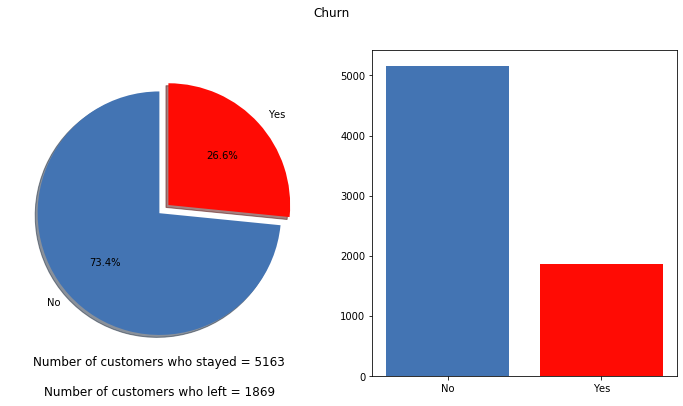

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)

ax1.pie(data2['Churn'].value_counts(), explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90, labels=data2['Churn'].unique(), colors=col_scheme)
fig.set_facecolor('white')

ax2.bar(data2['Churn'].unique(), data2['Churn'].value_counts(), color=col_scheme)
ax1.text(0.5, 0.0, "Number of customers who stayed = %d" % len(data2[data2['Churn'] == 'No']), size=12, ha="center", 
         transform=ax1.transAxes)
ax1.text(0.5,-0.1, "Number of customers who left = %d" % len(data2[data2['Churn'] == 'Yes']), size=12, ha="center", 
         transform=ax1.transAxes)

plt.suptitle('Churn')
plt.show()

Now let's look at customer churning against the different variables.

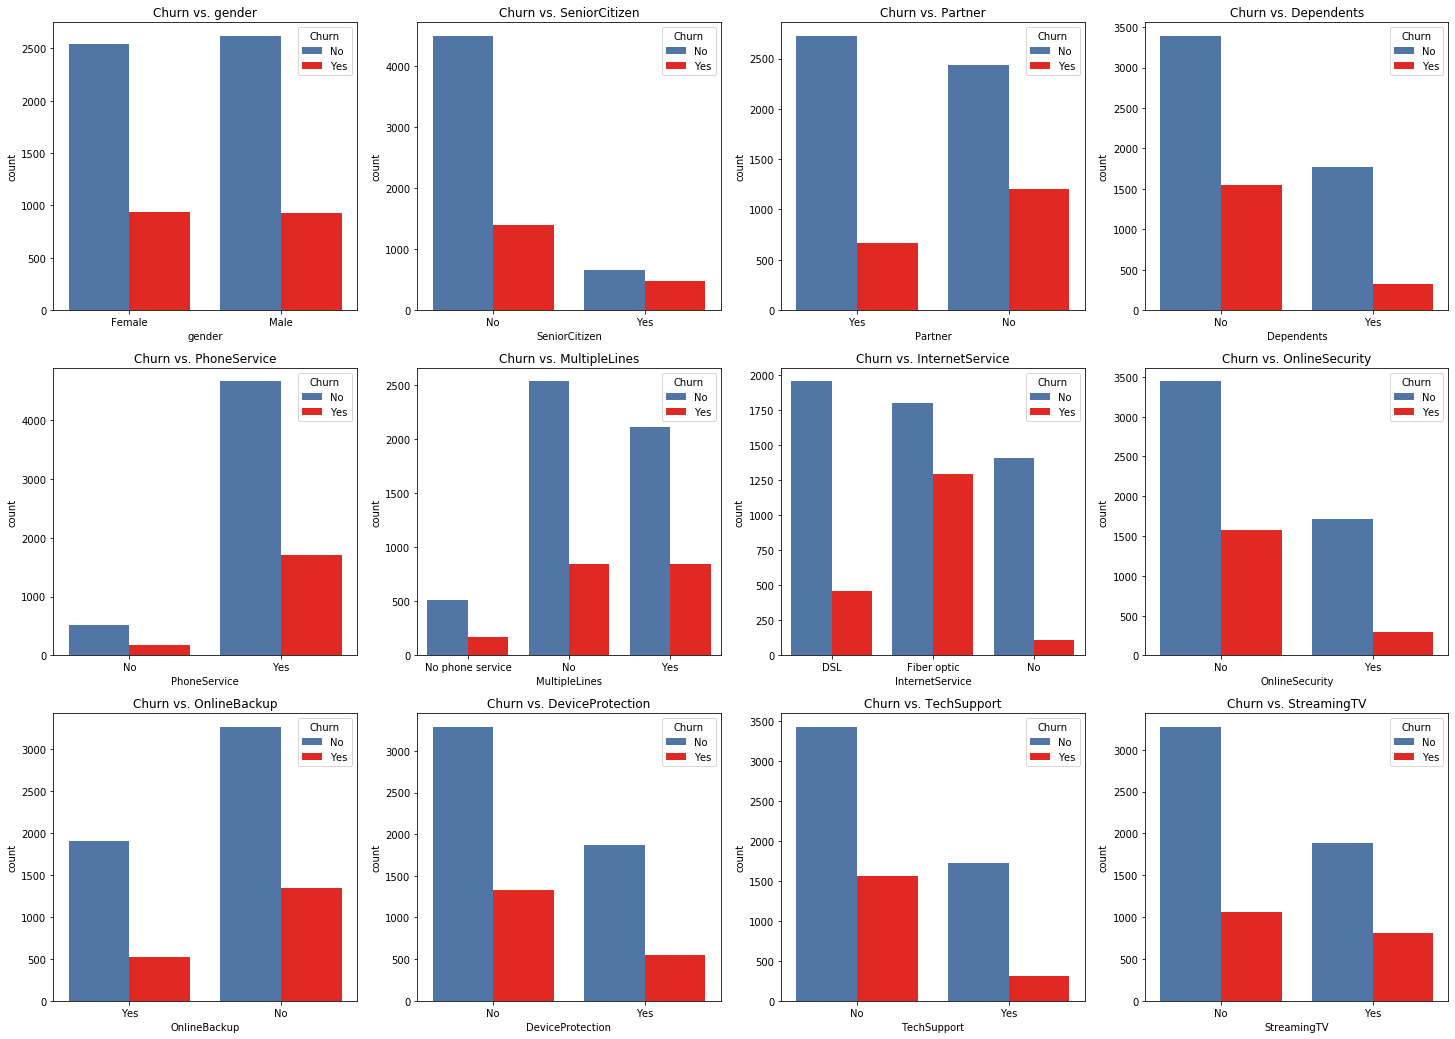

In [27]:
sns.set_palette(sns.color_palette(col_scheme))
fig, ax =plt.subplots(3,4,figsize=(25,18))

sns.countplot('gender', hue='Churn', data=data2, ax=ax[0,0])
ax[0,0].set_title('Churn vs. gender')
sns.countplot('SeniorCitizen', hue='Churn', data=data2, ax=ax[0,1])
ax[0,1].set_title('Churn vs. SeniorCitizen')
sns.countplot('Partner', hue='Churn', data=data2, ax=ax[0,2])
ax[0,2].set_title('Churn vs. Partner')
sns.countplot('Dependents', hue='Churn', data=data2, ax=ax[0,3])
ax[0,3].set_title('Churn vs. Dependents')

sns.countplot('PhoneService', hue='Churn', data=data2, ax=ax[1,0])
ax[1,0].set_title('Churn vs. PhoneService')
sns.countplot('MultipleLines', hue='Churn', data=data2, ax=ax[1,1])
ax[1,1].set_title('Churn vs. MultipleLines')
sns.countplot('InternetService', hue='Churn', data=data2, ax=ax[1,2])
ax[1,2].set_title('Churn vs. InternetService')
sns.countplot('OnlineSecurity', hue='Churn', data=data2, ax=ax[1,3])
ax[1,3].set_title('Churn vs. OnlineSecurity')

sns.countplot('OnlineBackup', hue='Churn', data=data2, ax=ax[2,0])
ax[2,0].set_title('Churn vs. OnlineBackup')
sns.countplot('DeviceProtection', hue='Churn', data=data2, ax=ax[2,1])
ax[2,1].set_title('Churn vs. DeviceProtection')
sns.countplot('TechSupport', hue='Churn', data=data2, ax=ax[2,2])
ax[2,2].set_title('Churn vs. TechSupport')
sns.countplot('StreamingTV', hue='Churn', data=data2, ax=ax[2,3])
ax[2,3].set_title('Churn vs. StreamingTV')

plt.show()

Only a few things of note from these graphs above:
* Senior Citizen customers luckily make up a small portion of the business because almost as many left as stayed.
* The amount of customers with a partner versus with no partner is fairly even. But if we look at customers who don't have a partner and left the company, the amount is almost double those with a partner who left.
* There are less customers using Fiber Optic **InternetService** than there are using DSL service. However, the amount of customers who left the company and had Fiber Optic **InternetService** versus the amount who left and had DSL is nearly double.
* There seems to be a significant proportional difference in the Churn vs. StreamingTV graph

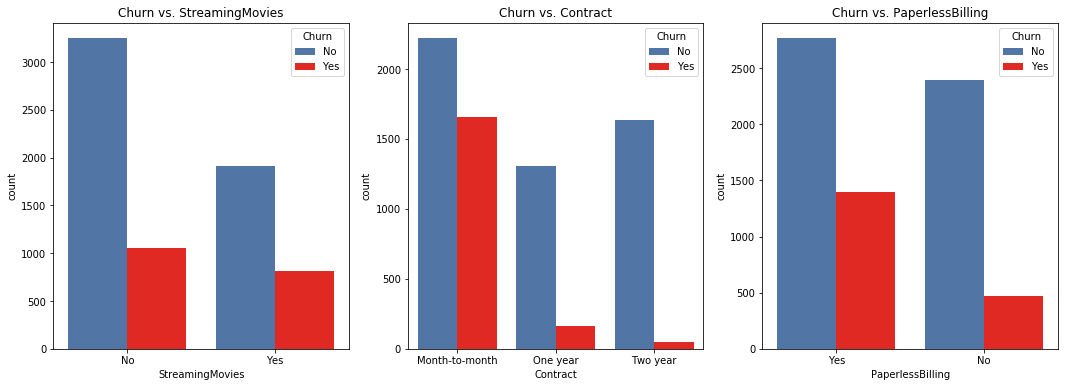

In [22]:
fig, ax = plt.subplots(1,3,figsize=(18,6))

sns.countplot('StreamingMovies', hue='Churn', data=data2, ax=ax[0])
ax[0].set_title('Churn vs. StreamingMovies')
sns.countplot('Contract', hue='Churn', data=data2, ax=ax[1])
ax[1].set_title('Churn vs. Contract')
sns.countplot('PaperlessBilling', hue='Churn', data=data2, ax=ax[2])
ax[2].set_title('Churn vs. PaperlessBilling')

plt.show()

Two things stand out from these three graphs above:
* Look at all those Month-to-month customers who leave the company in the Churn vs. Contract graph! 
* Customers with paperless billing left at a much higher frequency than customers who recieve paper copies of their bill.

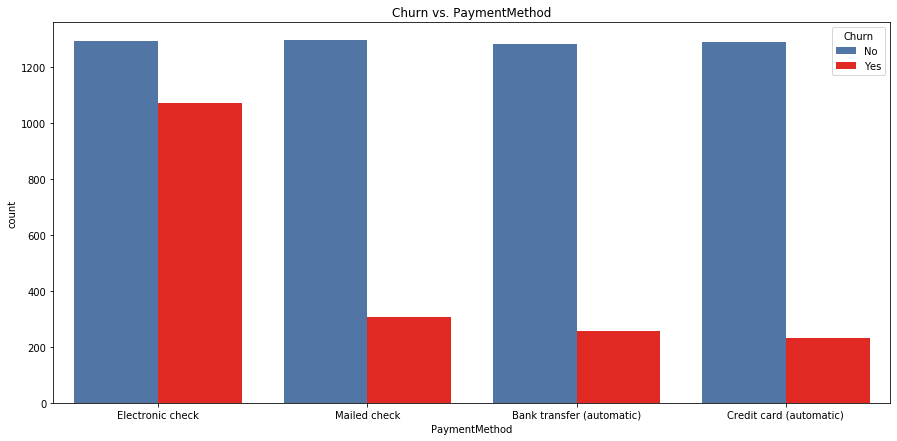

In [23]:
plt.figure(figsize=(15,7))
sns.countplot('PaymentMethod', hue='Churn', data=data2).set_title('Churn vs. PaymentMethod')

plt.show()

This is interesting: when it comes to payment methods, the amount of customers who paid by electronic check and churned is almost 4 times any other method of payment. The raw numbers are below.

In [24]:
pay_meth = pd.DataFrame(data2.groupby(['PaymentMethod', 'Churn'])['Churn'].count())
pay_meth

Churn
PaymentMethod             Churn       
Bank transfer (automatic) No      1284
                          Yes      258
Credit card (automatic)   No      1289
                          Yes      232
Electronic check          No      1294
                          Yes     1071
Mailed check              No      1296
                          Yes      308

## IV. Data Preprocessing

#### More libraries:

In [152]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

The goal in this section, Data Preprocessing, is to get our data ready for modeling. In this project we will do that in three ways:
1. We'll be creating dummy variables using `get_dummies()` from `pandas`. This will create new columns out of our categorical features. To demonstrate, Contract will get binary columns for each response: Contract_Month-to-month : 1 or 0, Contract_One year : 1 or 0, etc. and of course, 1 or 0 will be indicate Yes or No, respectively. Another (faster) way we could've done this is using a pipline with a column transformer. However, retaining the column names to learn about feature importances would be a hefty task. 

2. We will then take our continuous variables (**tenure**, **MonthlyCharges**, **TotalCharges**) and scale them using `StandardScaler()`. There is plenty to read on the internet about [Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling). Here is the short version: each value in a column is subtracted by the mean of the column, that number is then divided by the standard deviation of the column, that value now replaces the original value and the end result is that the new mean of the column is 0 and the new standard deviation is 1. The point of this process is to get our variables on the same scale for more effective learning.

3. Before we do all that we will split the data in training and testing sets. The testing set will consist of 20% of the full dataset, which means that the training set will have 80% of the full dataset. The last thing to note is that we will stratify the data on the `Churn` feature, meaning that proportion of `Yes` and `No` `Chrun` responses in the full dataset will be the same in the training and testing sets.

We'll be creating a pipeline to streamline this process using `ColumnTransformer()`.

In [220]:
# Drop 'customerID'
data2.drop('customerID', axis=1, inplace=True)

In [225]:
# List of categorical and continuous features
cont_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_feats = [i for i in data2 if i not in cont_feats]
cat_feats.remove('Churn')

In [226]:
final_dat = pd.get_dummies(data2, columns=cat_feats)

In [232]:
# Update of categorical features
cat_feats = [i for i in final_dat if i not in cont_feats]
cat_feats.remove('Churn')

In [233]:
train_set, test_set = train_test_split(final_dat, test_size=0.2, random_state=42, stratify=final_dat['Churn'])

In [235]:
data_tr = train_set[cont_feats+cat_feats].copy()
train_labels = train_set['Churn'].copy()
data_te = test_set[cont_feats+cat_feats].copy()
test_labels = test_set['Churn'].copy()

In [236]:
std_scal = StandardScaler()
data_tr[cont_feats] = std_scal.fit_transform(data_tr[cont_feats])

In [238]:
data_te[cont_feats] = std_scal.transform(data_te[cont_feats])

## V. Modeling

#### And even more libraries:

In [307]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import export_graphviz

## V.i Random Forest

Then, we build and run the model. We are going to implement **RandomizedSearchCV** to help us tune our model so we are using the best parameters from a list of different parameters we would like to train on.

In [240]:
# Outline parameters to test
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_features' : [7,8,9],
    'max_depth' : [3,4,5,6]
}

In [241]:
rf_clf = RandomForestClassifier()
rf_grid = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy',
                           return_train_score=True)
rf_grid.fit(data_tr, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [242]:
cvres = rf_grid.cv_results_
grid_rf_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
pd.set_option('display.max_colwidth', None)
grid_rf_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
26,0.809733,0.798400,"{'max_depth': 5, 'max_features': 9, 'n_estimators': 800}"
27,0.816978,0.798933,"{'max_depth': 6, 'max_features': 7, 'n_estimators': 300}"
28,0.817067,0.799467,"{'max_depth': 6, 'max_features': 7, 'n_estimators': 500}"
29,0.817244,0.798933,"{'max_depth': 6, 'max_features': 7, 'n_estimators': 800}"
30,0.817556,0.798933,"{'max_depth': 6, 'max_features': 8, 'n_estimators': 300}"
31,0.818533,0.800533,"{'max_depth': 6, 'max_features': 8, 'n_estimators': 500}"
32,0.818178,0.800356,"{'max_depth': 6, 'max_features': 8, 'n_estimators': 800}"
33,0.819244,0.799467,"{'max_depth': 6, 'max_features': 9, 'n_estimators': 300}"
34,0.820533,0.800711,"{'max_depth': 6, 'max_features': 9, 'n_estimators': 500}"
35,0.819244,0.801422,"{'max_depth': 6, 'max_features': 9, 'n_estimators': 800}"


In [303]:
final_model = rf_grid.best_estimator_
rf_preds = final_model.predict(data_te)
rfmod_pred_score = accuracy_score(test_labels, rf_preds)

In [304]:
print('Train error rate = %.2f%%' % ((1 - rf_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - rfmod_pred_score) * 100))

Train error rate = 19.86%
Test error rate = 20.75%


So, after we run and score the model, we are getting a test error rate of **20.75%**. In other words, **79.25%** of the time we are able to correctly predict whether a customer is going to **Churn** or not, and **20.75%** of the time we are incorrect in our prediction. Our testing and training error rates are pretty close as well, we me have some slight overfitting in place, but nothing severe - this model should generalize well on new data. Let's investigate further.

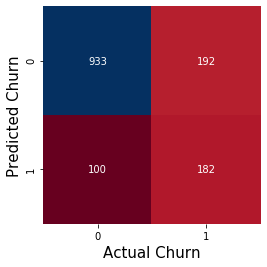

Total predictions = 1407


In [305]:
mat = confusion_matrix(test_labels, rf_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(test_labels))

The plot above is called a confusion matrix. The X axis is the actual value from the data set, the y axis is the predicted value. Here is what the confusion matrix tells us:
* The model predicted that 1125 customers **would not** churn. Of those predictions, the model was correct **82.93%** of the time.
* The model predicted that 282 customers **would** churn. Of those predictions, the model was correct **64.54%** of the time.

The model does fairly well in predicting that customers will stay, but not so much in predicting that a customer will leave.

Next, we'll look at which features the model considered most important for making its predictions.

In [247]:
rf_importances = pd.DataFrame(rf_grid.best_estimator_.feature_importances_,
                                   index = data_tr.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
top_6 = rf_importances[rf_importances['Importance'] > .06]
rf_importances

,Importance
Contract_Month-to-month,0.187420
tenure,0.144937
TotalCharges,0.093592
OnlineSecurity_No,0.092156
TechSupport_No,0.066117
InternetService_Fiber optic,0.064380
MonthlyCharges,0.055476
PaymentMethod_Electronic check,0.046735
Contract_Two year,0.037902
InternetService_DSL,0.024486


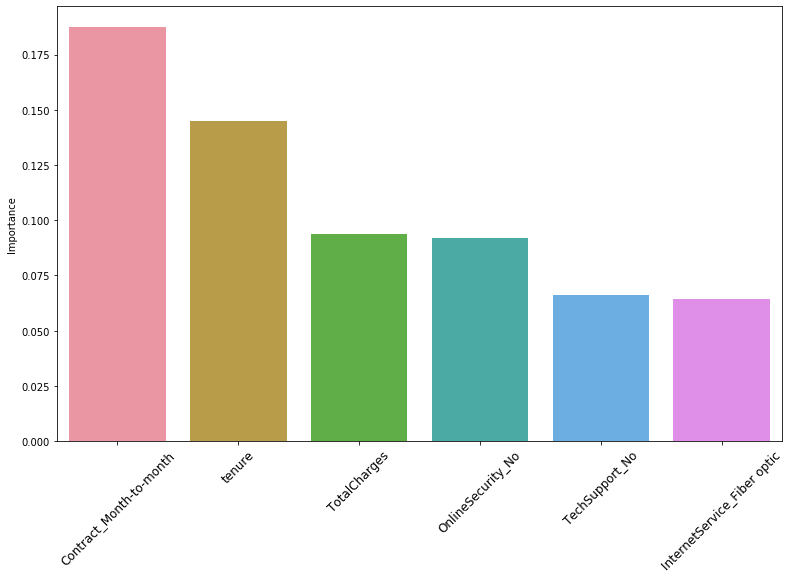

In [248]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top_6.index, top_6['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

The barplot above tells us that the most important feature in making predictions is **Contract_Month-to-month**, followed by **tenure**, **TotalCharges**, **OnlineSecurity_No**, **TechSupport_No**, and **InternetService_Fiber optic**, respectively.

## V.ii Decision Tree Classifier

Now lets play with Decision Tree Classifiers and see if we get any better performance.

In [249]:
# Outline parameters to test
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : [4,5,6],
    'max_depth' : [3,4,5]
}

In [251]:
dt_clf = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy',
                           return_train_score=True)
dt_grid.fit(data_tr, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [253]:
cvres = dt_grid.cv_results_
grid_dt_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
pd.set_option('display.max_colwidth', None)
grid_dt_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
26,0.779644,0.767111,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 5, 'splitter': 'best'}"
27,0.760178,0.754311,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 5, 'splitter': 'random'}"
28,0.782622,0.777956,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'splitter': 'best'}"
29,0.776844,0.767644,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'splitter': 'random'}"
30,0.779556,0.777244,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 4, 'splitter': 'best'}"
31,0.755111,0.751111,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 4, 'splitter': 'random'}"
32,0.781467,0.772444,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'splitter': 'best'}"
33,0.771378,0.763733,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'splitter': 'random'}"
34,0.788667,0.781867,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'splitter': 'best'}"
35,0.776667,0.766400,"{'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'splitter': 'random'}"


In [300]:
final_model = dt_grid.best_estimator_
dt_preds = final_model.predict(data_te)
dtmod_pred_score = accuracy_score(test_labels, dt_preds)

In [301]:
print('Train error rate = %.2f%%' % ((1 - dt_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - dtmod_pred_score) * 100))

Train error rate = 21.72%
Test error rate = 22.96%


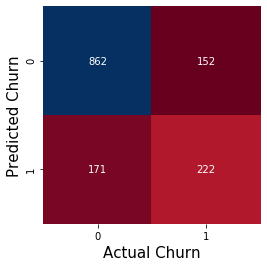

In [302]:
mat = confusion_matrix(test_labels, dt_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()

Here is what this confusion matrix tells us:
* The model predicted that 1014 customers **would not** churn. Of those predictions, the model was correct **85.01%** of the time.
* The model predicted that 393 customers **would** churn. Of those predictions, the model was correct **56.49%** of the time.

The model does a better job than Random Forest in predicting that customers will stay, but not so much in predicting that a customer will leave.

In [260]:
dt_importances = pd.DataFrame(dt_grid.best_estimator_.feature_importances_,
                                   index = data_tr.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
top_6 = dt_importances[dt_importances['Importance'] > .06]
dt_importances

,Importance
TechSupport_No,0.454880
Contract_Month-to-month,0.178967
Contract_Two year,0.106535
InternetService_DSL,0.075477
TotalCharges,0.060220
InternetService_Fiber optic,0.046592
tenure,0.022262
MonthlyCharges,0.015970
Dependents_Yes,0.009022
Partner_No,0.006539


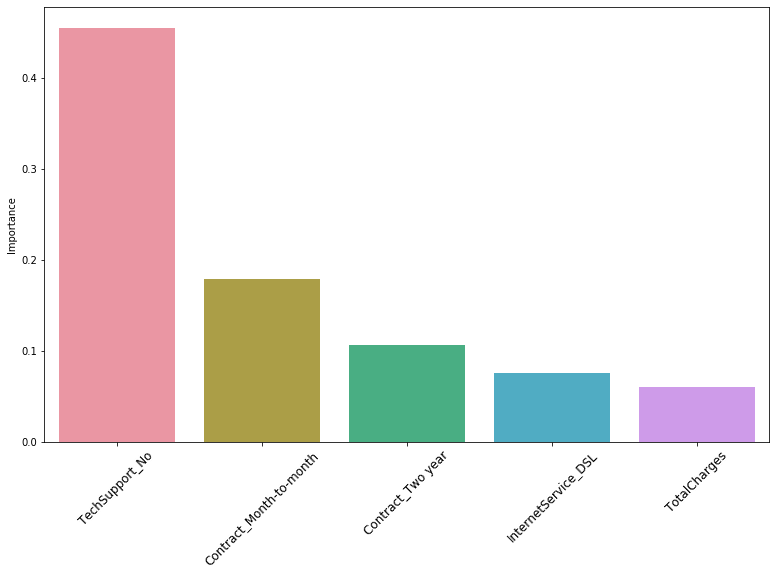

In [261]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top_6.index, top_6['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

Now Decision Tree has a slightly different take. It says that **TechSupport_No** is the most important feature in making decisions, followed by **Contract_Month-to-Month**, **Contract_Two year**, **InternsetService_DSL**, and **TotalCharges**.

That's enough for tree based methods.

## V.iii Support Vector Machine (Classifier)

### Note that with Support Vector Machines feature importances are handled a bit differently, we'll come back another day to write that code.

In [283]:
param_grid = [    
    {'C': [.1,1,10], 'max_iter': [1000, 2000, 5000], 'tol': [1e-4, 1e-10]}
  ]

In [285]:
# Numerous convergence warnings
svm_clf = LinearSVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(data_tr, train_labels)

/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lawrencelove/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10], 'max_iter': [1000, 2000, 5000],
                          'tol': [0.0001, 1e-10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [287]:
cvres = grid_search.cv_results_
grid_svc_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
pd.set_option('display.max_colwidth', None)
grid_svc_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
8,0.805156,0.802311,"{'C': 1, 'max_iter': 2000, 'tol': 0.0001}"
9,0.805156,0.802311,"{'C': 1, 'max_iter': 2000, 'tol': 1e-10}"
10,0.805156,0.802311,"{'C': 1, 'max_iter': 5000, 'tol': 0.0001}"
11,0.805156,0.802311,"{'C': 1, 'max_iter': 5000, 'tol': 1e-10}"
12,0.804044,0.797333,"{'C': 10, 'max_iter': 1000, 'tol': 0.0001}"
13,0.803289,0.800533,"{'C': 10, 'max_iter': 1000, 'tol': 1e-10}"
14,0.805156,0.800889,"{'C': 10, 'max_iter': 2000, 'tol': 0.0001}"
15,0.805200,0.800711,"{'C': 10, 'max_iter': 2000, 'tol': 1e-10}"
16,0.804889,0.801778,"{'C': 10, 'max_iter': 5000, 'tol': 0.0001}"
17,0.804889,0.801600,"{'C': 10, 'max_iter': 5000, 'tol': 1e-10}"


In [297]:
final_model = grid_search.best_estimator_
svc_preds = final_model.predict(data_te)
svc_pred_score = accuracy_score(test_labels, svc_preds)

In [298]:
print('Train error rate = %.2f%%' % ((1 - grid_search.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - svc_pred_score) * 100))

Train error rate = 19.75%
Test error rate = 19.83%


The **SVM** worked better than the **Decision Tree**, but just a smidge worse than **Random Forest**. At a **19.83%** error rate, the **SVM** is making correct predictions **80.17%** of the time.

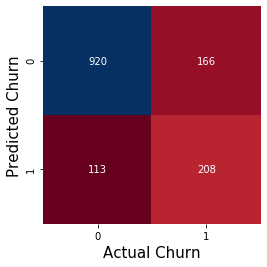

In [299]:
mat = confusion_matrix(test_labels, svc_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()

From the **SVM** confusion matrix we learn:
* The model predicted that 1086 customers **would not** churn. Of those predictions, the model was correct **84.71%** of the time.
* The model predicted that 321 customer **would** churn. Of those predictions, the model was correct **64.80%** of the time.

Similar results to the Random Forest and Decision Tree confusion matrices: better at predicting when customers won't churn than will churn. Although ever so slightly, specifically when predicting a customer will churn, **SVM** performed the best.

## VI. Conclusions

Let's wrap it all up/summarize and make some conclusions. We can use all this information to raise some more questions as well.

In [308]:
# Create DataFrames out of the classifation reports for each model
rf_report = pd.DataFrame(classification_report(test_labels, rf_preds, output_dict=True)).transpose()
dt_report = pd.DataFrame(classification_report(test_labels, dt_preds, output_dict=True)).transpose()
svc_report = pd.DataFrame(classification_report(test_labels, svc_preds, output_dict=True)).transpose()

# Put the reports into a list for iteration
result_dfs = [rf_report, dt_report, svc_report]

# Construt empty DataFrame
results = pd.DataFrame([])

# Loop through the results list of DataFrames
for i in result_dfs:
    
    # Append only the 'weighted avg' row to a new DataFrame
    results = results.append(pd.DataFrame(i.loc['weighted avg']).transpose())
    
# Change index names to reflect there specific results
results = results.reset_index(drop=True)
results = results.rename(index={0 : 'Random Forest', 1 : 'Decision Tree',
                               2 : 'Support Vector Machine'})
results.index.name = 'Model'
results = results.reset_index()

# Remove 'support' column
del results['support']

If you need a crash course on Recall, Precision, and F1-Score you can follow this [link](https://pathmind.com/wiki/accuracy-precision-recall-f1) to a great explanation. The short version:
* Use precision when the cost of a false positive is high.
* Use recall when the cost of a false negative is high.
* F1-Score is a way to find a happy medium.

*We are using weighted scores*

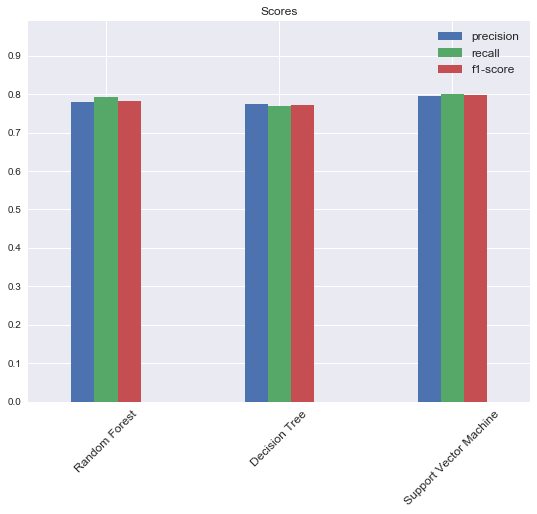

,Model,precision,recall,f1-score
0,Random Forest,0.780439,0.792466,0.782337
1,Decision Tree,0.774285,0.770434,0.772212
2,Support Vector Machine,0.794203,0.801706,0.796625


In [309]:
plt.style.use('seaborn')
ax = results.plot(x='Model', y=['precision', 'recall', 'f1-score'], kind="bar", 
             width=.4, ylim=(0,.99), figsize=(9,7), title='Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1, step=0.1))
ax.set_xlabel("")
plt.legend(prop={'size': 12}, loc=1)
plt.show()

results

In [312]:
print('Random Forest error rate = %.2f%%' % ((1 - rfmod_pred_score) * 100))
print('Decision Tree error rate = %.2f%%' % ((1 - dtmod_pred_score) * 100))
print('Support Vector Machine error rate = %.2f%%' % ((1 - svc_pred_score) * 100))

Random Forest error rate = 20.75%
Decision Tree error rate = 22.96%
Support Vector Machine error rate = 19.83%


In comparing the two models that allowed us to view feature importances (Decision Tree and Random Forest), we find that our most important features are: **Contract**, **TotalCharges**, **TechSupport**, and **InternetService**.

We can see that Random Forest suggested that **Month-to-month** contracts and **tenure** were its two most important features in making predictions. Additionally, Decision Tree considered **Month-to-month** contracts as its second most important feature. And finally, when we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their **Month-to-month** customers. What kind of incentives can this company offer to customers to get them to sign **One-year** or **Two-year** contracts? What adjustments can be made to **Month-to-Month** contracts that would be more favorable to customers, without taking away the appeal of a **One-year** or **Two-year** contract?

**InternetService** was another important factor in making predictions, specifically, **Fiber optic internet service** & **DSL internet service**. We are not privy to the historical timing of this data, but it is a major problem that more people with **fiber optic internet service** are leaving than with **DSL internet service**. With fiber optics being the newer technology, maybe it’s possible that the company was still working out some kinks? Regardless, if the newer (and supposed to be more efficient) technology is causing people to run from your company, you have a problem. Further, more in-depth, research is needed to fully understand this **InternetService** issue, but at the least we now know that it is an area to focus on.

As far as model performance, Support Vector Machine performed best, having the highest scores in every scoring category (recall, precision, and F1), although not by much. Second place goes to the Random Forest, and Decision Tree last. Every model performed decent enough when predicting a customer would stay, and poorly when predicting a customer would leave. This is likely because only about a quarter of our data contains customers who **Churned**, so predicting that class will take a hit. The Support Vector Machine was most accurate in predicting that a customer would leave, but only by a small percentage.

We were able to learn a lot from the project: how long customers are staying with the company, which features are most likely to contribute to customers leaving, and we have 3 different models to test for predicting customer churning. Most importantly, we've raised concerns that allow for some questions to be answered, for further investigation to be completed, and for more information to be gathered. We now have targets to focus in on and conduct a new study in the future.